In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
df.drop(['id', 'imdb_id', 'homepage'], axis = 1, inplace = True)

In [5]:
df.drop('overview', axis = 1, inplace = True)

In [6]:
df.drop('tagline', axis = 1, inplace = True)

In [7]:
type(df['release_date'][0])

str

In [8]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [18]:
action = df['genres'].str.count('Action').sum()

2385.0

In [4]:
df = pd.read_csv('cleaned.csv')

In [43]:
df_cast=df.copy()

In [44]:
df_cast = df_cast.drop('cast', axis=1).join(df_cast['cast'].str.split('|', expand = True).stack().reset_index(level=1, drop = True).rename('cast'))

In [45]:
df_cast[['original_title', 'cast']].head()

,original_title,cast
0,Jurassic World,Chris Pratt
0,Jurassic World,Bryce Dallas Howard
0,Jurassic World,Irrfan Khan
0,Jurassic World,Vincent D'Onofrio
0,Jurassic World,Nick Robinson


In [46]:
df_cast = df_cast.groupby('cast').count()

In [55]:
df_cast.reset_index()

,cast,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,Larry Mullen Jr.,2,0,0,2,2,2,2,2,1,2,2,2,2,0,0,2
1,Nicole MuÃ±oz,1,0,0,1,1,0,1,1,0,1,1,1,1,0,0,1
2,Therese Giehse,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1
3,"""Weird Al"" Yankovic",1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
4,50 Cent,12,9,5,12,12,8,12,12,12,12,12,12,12,9,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19021,Äá»— Thá»‹ Háº£i Yáº¿n,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19022,Å arÅ«nas Bartas,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1
19023,Åžafak Sezer,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,1
19024,à¸ªà¸£à¸žà¸‡à¸©à¹Œ à¸Šà¸²à¸•à¸£à¸µ,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [62]:
df_cast.to_csv('cast.csv', index = None)

In [51]:
df_cast.head()

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
cast,,,,,,,,,,,,,,,,
Larry Mullen Jr.,2,0,0,2,2,2,2,2,1,2,2,2,2,0,0,2
Nicole MuÃ±oz,1,0,0,1,1,0,1,1,0,1,1,1,1,0,0,1
Therese Giehse,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1
"""Weird Al"" Yankovic",1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
50 Cent,12,9,5,12,12,8,12,12,12,12,12,12,12,9,5,12


In [9]:
df['release_month'] = df['release_date'].str.split('/').str[0].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   keywords              9373 non-null   object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

In [11]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,6.827259
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,3.441802
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,10.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000


In [12]:
## make 0 into Nan
cols = ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
df[cols] = df[cols].replace({0:np.nan})

In [13]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03,10866.000000
mean,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08,6.827259
std,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08,3.441802
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,1.000000
25%,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07,4.000000
50%,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07,7.000000
75%,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08,10.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000


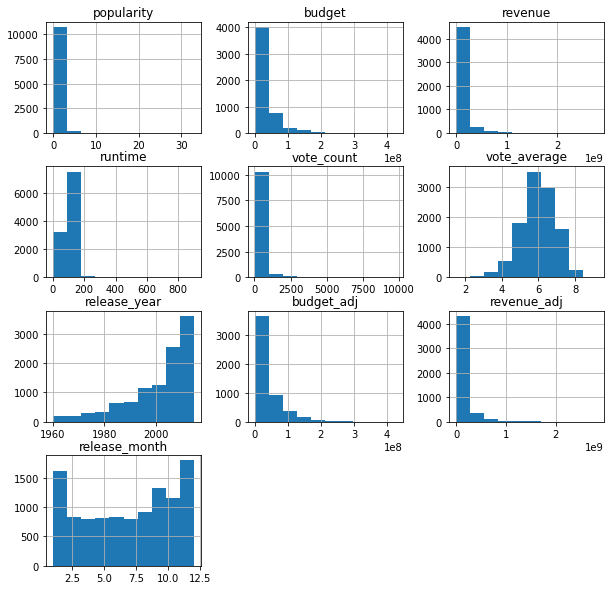

In [14]:
df.hist(figsize = (10,10));

In [15]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
popularity,1.000000,0.479958,0.629316,0.136901,0.800828,0.209511,0.089801,0.435341,0.561760,0.043243
budget,0.479958,1.000000,0.688548,0.265416,0.580043,0.092007,0.215388,0.959131,0.533497,0.046832
revenue,0.629316,0.688548,1.000000,0.237811,0.764122,0.206958,0.121289,0.657577,0.905011,0.043085
runtime,0.136901,0.265416,0.237811,1.000000,0.162607,0.154798,-0.112271,0.329267,0.263979,0.070388
vote_count,0.800828,0.580043,0.764122,0.162607,1.000000,0.253823,0.107948,0.523479,0.666509,0.026299
vote_average,0.209511,0.092007,0.206958,0.154798,0.253823,1.000000,-0.117632,0.112248,0.242429,0.073210
release_year,0.089801,0.215388,0.121289,-0.112271,0.107948,-0.117632,1.000000,0.036619,-0.099530,-0.047026
budget_adj,0.435341,0.959131,0.657577,0.329267,0.523479,0.112248,0.036619,1.000000,0.570466,0.073815
revenue_adj,0.561760,0.533497,0.905011,0.263979,0.666509,0.242429,-0.099530,0.570466,1.000000,0.062103
release_month,0.043243,0.046832,0.043085,0.070388,0.026299,0.073210,-0.047026,0.073815,0.062103,1.000000


In [16]:
df.to_csv('cleaned.csv', index = False)

In [9]:
df = pd.read_csv('cleaned.csv')

In [10]:
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,4


In [6]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03,10866.000000
mean,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08,6.827259
std,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08,3.441802
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,1.000000
25%,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07,4.000000
50%,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07,7.000000
75%,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08,10.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000


### below is finding

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('cleaned.csv')

In [18]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
popularity,1.000000,0.479958,0.629316,0.136901,0.800828,0.209511,0.089801,0.435341,0.561760,0.043243
budget,0.479958,1.000000,0.688548,0.265416,0.580043,0.092007,0.215388,0.959131,0.533497,0.046832
revenue,0.629316,0.688548,1.000000,0.237811,0.764122,0.206958,0.121289,0.657577,0.905011,0.043085
runtime,0.136901,0.265416,0.237811,1.000000,0.162607,0.154798,-0.112271,0.329267,0.263979,0.070388
vote_count,0.800828,0.580043,0.764122,0.162607,1.000000,0.253823,0.107948,0.523479,0.666509,0.026299
vote_average,0.209511,0.092007,0.206958,0.154798,0.253823,1.000000,-0.117632,0.112248,0.242429,0.073210
release_year,0.089801,0.215388,0.121289,-0.112271,0.107948,-0.117632,1.000000,0.036619,-0.099530,-0.047026
budget_adj,0.435341,0.959131,0.657577,0.329267,0.523479,0.112248,0.036619,1.000000,0.570466,0.073815
revenue_adj,0.561760,0.533497,0.905011,0.263979,0.666509,0.242429,-0.099530,0.570466,1.000000,0.062103
release_month,0.043243,0.046832,0.043085,0.070388,0.026299,0.073210,-0.047026,0.073815,0.062103,1.000000


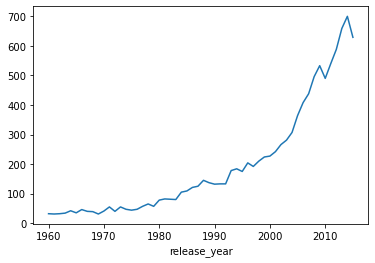

In [44]:
df.groupby('release_year').count().original_title.plot().hist;

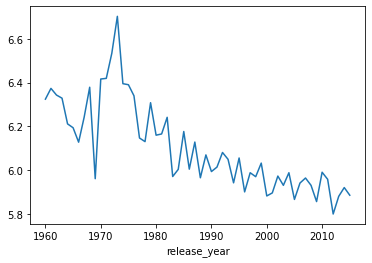

In [38]:
df.groupby('release_year').mean().vote_average.plot();

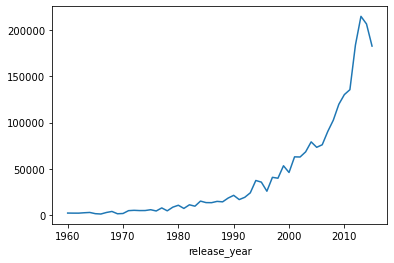

In [39]:
df.groupby('release_year').sum().vote_count.plot();

In [ ]:
## there is more film reistered and more vote in recent yeares, but the avg_ rate is lower.

In [65]:
df_bud= df.dropna()

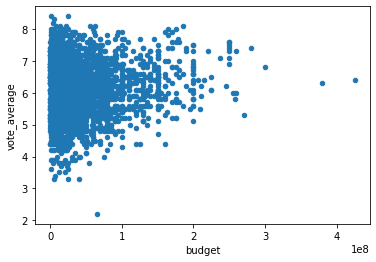

In [66]:
df_bud.plot(kind='scatter', x = 'budget', y = 'vote_average');

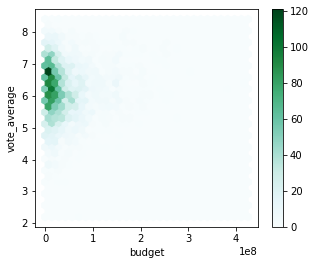

In [67]:
df_bud.plot.hexbin(x = 'budget', y = 'vote_average', gridsize = 30, sharex = False, figsize = (5,4));

In [68]:
df_bud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3678 non-null   float64
 1   budget                3678 non-null   float64
 2   revenue               3678 non-null   float64
 3   original_title        3678 non-null   object 
 4   cast                  3678 non-null   object 
 5   director              3678 non-null   object 
 6   keywords              3678 non-null   object 
 7   runtime               3678 non-null   float64
 8   genres                3678 non-null   object 
 9   production_companies  3678 non-null   object 
 10  release_date          3678 non-null   object 
 11  vote_count            3678 non-null   int64  
 12  vote_average          3678 non-null   float64
 13  release_year          3678 non-null   int64  
 14  budget_adj            3678 non-null   float64
 15  revenue_adj         

In [69]:
df_bud.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,3678.000000,3.678000e+03,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3.678000e+03,3.678000e+03,3678.000000
mean,1.225880,3.811245e+07,1.114105e+08,109.556552,547.583197,6.182436,2001.094345,4.538375e+07,1.420504e+08,7.049483
std,1.498729,4.267018e+07,1.793474e+08,19.854487,894.862105,0.789743,11.379792,4.518652e+07,2.194983e+08,3.362635
min,0.010335,1.000000e+00,2.000000e+00,26.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.861934e+00,1.000000
25%,0.481364,1.000000e+07,1.489561e+07,96.000000,78.000000,5.700000,1995.000000,1.381637e+07,2.038559e+07,4.000000
50%,0.829585,2.500000e+07,4.804570e+07,106.000000,218.500000,6.200000,2004.000000,3.105061e+07,6.548580e+07,7.000000
75%,1.410847,5.000000e+07,1.297594e+08,119.750000,595.500000,6.700000,2010.000000,6.214554e+07,1.704382e+08,10.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,12.000000


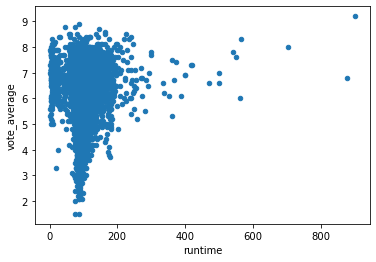

In [72]:
df.plot(kind = 'scatter', x = 'runtime', y = 'vote_average');

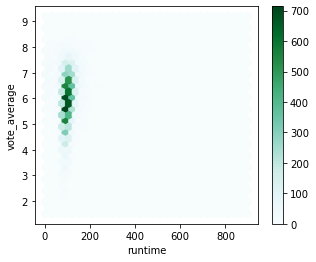

In [73]:
df.plot.hexbin(x = 'runtime', y = 'vote_average', gridsize = 30, sharex = False, figsize = (5,4));

C:\Users\Kaori\anaconda3\lib\site-packages\matplotlib\contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Kaori\anaconda3\lib\site-packages\matplotlib\contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\Kaori\anaconda3\lib\site-packages\seaborn\distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


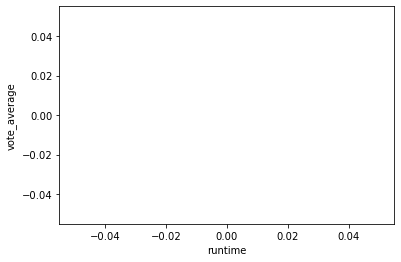

In [74]:
sns.kdeplot(df.runtime, df.vote_average);